In [2]:
from pybaseball import statcast, pitching_stats_range, statcast_pitcher, pitching_stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('data/pitcher_stats/pitching_stats_2023-2025.csv')

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['SO', 'IP', 'SO9', 'ERA', 'WHIP', 'BB', 'G', 'Age'])

df['SO_per_IP'] = df['SO'] / df['IP']
df['K_BB_ratio'] = df['SO'] / df['BB'].replace(0, np.nan)
df['SO_per_game'] = df['SO'] / df['G'].replace(0, np.nan)

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

print("Correlation with SO_per_game:")
print(corr_matrix['SO_per_game'].sort_values(ascending=False))

Correlation with SO_per_game:
SO_per_game    1.000000
GS             0.791838
HR             0.674940
Pit            0.674925
AB             0.673888
SO             0.673291
IP             0.672871
BF             0.671700
H              0.663192
ER             0.662167
2B             0.660393
R              0.655532
BB             0.620491
W              0.606992
GDP            0.574430
L              0.573298
CS             0.571308
3B             0.515830
SB             0.509462
HBP            0.497794
SF             0.481473
PO             0.433300
K_BB_ratio     0.398266
SO/W           0.398235
SO9            0.376258
StS            0.311208
SO_per_IP      0.261658
Str            0.166720
mlbID          0.058136
StL            0.039225
G              0.018578
GB/FB          0.013351
PU             0.010798
LD            -0.014112
BAbip         -0.051721
Age           -0.085445
IBB           -0.104829
SV            -0.139282
ERA           -0.162780
WHIP          -0.213395
#days     

## The top 5 best features for predictions strikeouts per game are GS, HR, Pit, AB, and SO because they are highly correlated with the target variable.

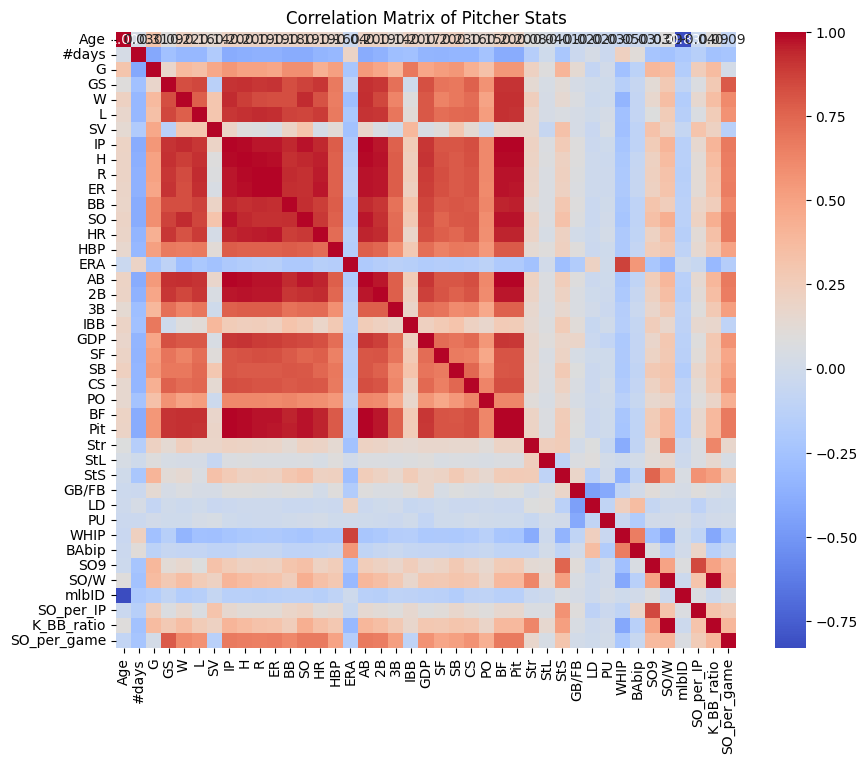

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Pitcher Stats")
plt.show()

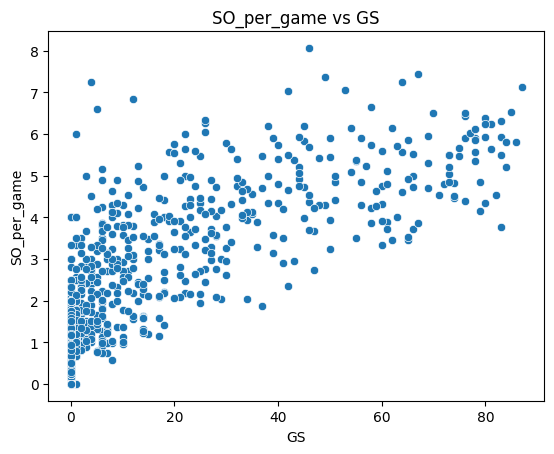

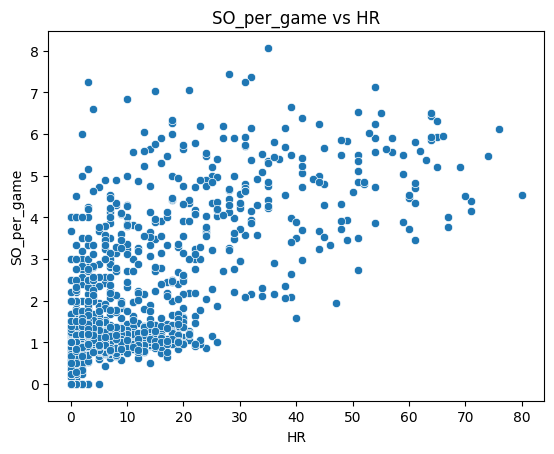

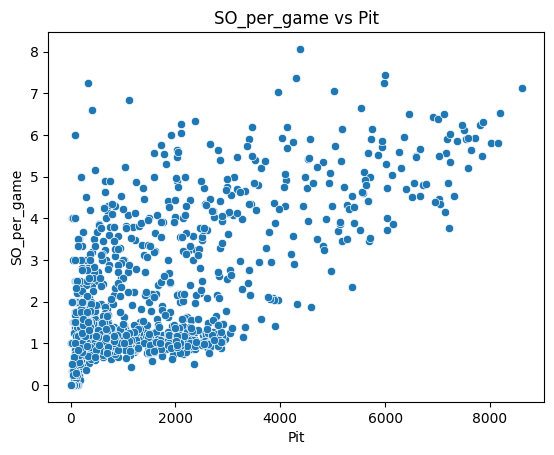

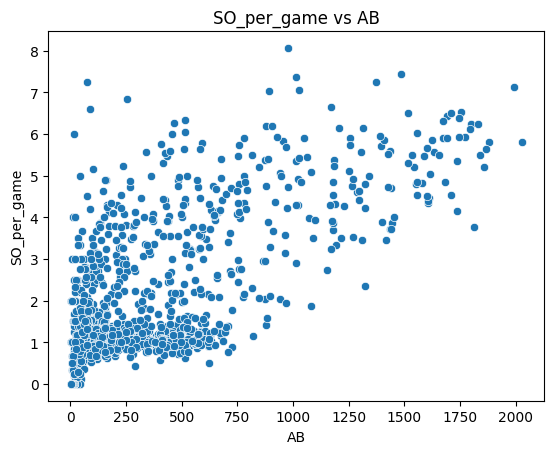

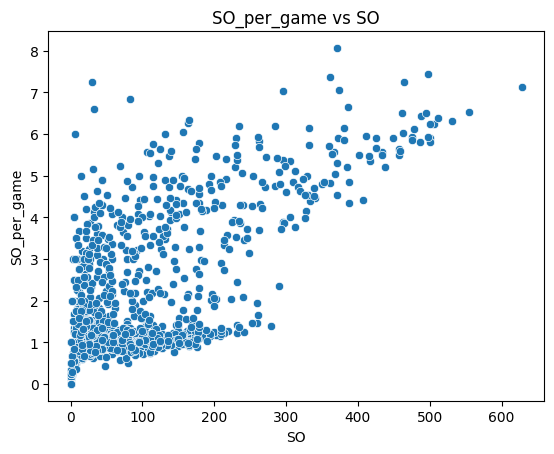

In [5]:
top_features = corr_matrix['SO_per_game'].abs().sort_values(ascending=False).index[1:6]
for feature in top_features:
    sns.scatterplot(data=df, x=feature, y='SO_per_game')
    plt.title(f"SO_per_game vs {feature}")
    plt.show()

## I will use these features to build the Random Forest Model in ml_preds.py